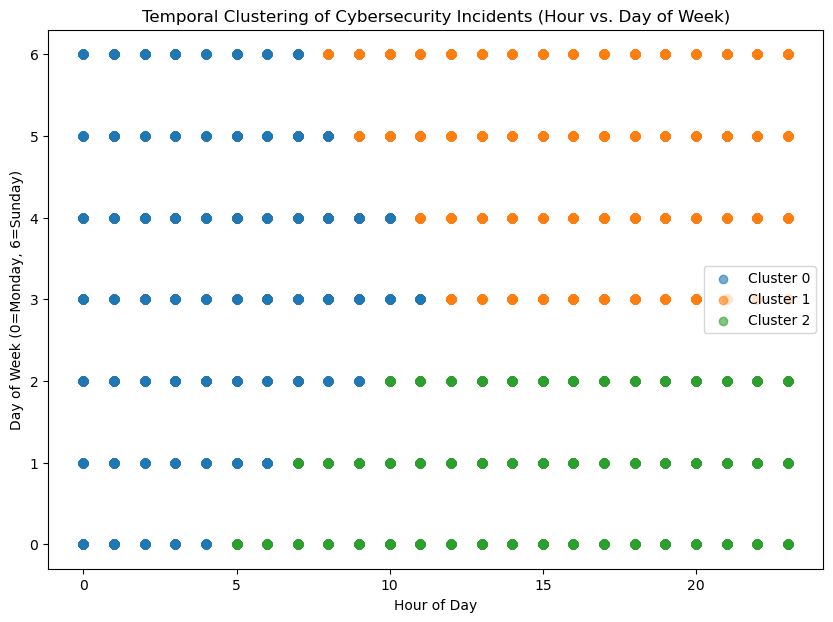

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the CSV dataset
df = pd.read_csv("incidents.csv")

# Convert the 'Timestamp' column to datetime objects
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Feature Engineering: Extract temporal features
df['hour'] = df['Timestamp'].dt.hour
df['day_of_week'] = df['Timestamp'].dt.dayofweek
df['month'] = df['Timestamp'].dt.month

# Select the temporal features
temporal_features = df[['hour', 'day_of_week', 'month']]

# Instantiate StandardScaler
scaler = StandardScaler()

# Apply fit_transform to scale the features
temporal_scaled = scaler.fit_transform(temporal_features)

# Instantiate KMeans with n_clusters=3 and random_state=0
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)

# Fit the model and predict clusters
clusters = kmeans.fit_predict(temporal_scaled)

# Add the cluster labels to the original DataFrame
df['cluster'] = clusters

# Create a figure and axes object for the plot
plt.figure(figsize=(10, 7))

# Get unique cluster labels
unique_clusters = np.sort(df['cluster'].unique())

# Iterate through each unique cluster and plot
for cluster_label in unique_clusters:
    mask = df['cluster'] == cluster_label
    plt.scatter(
        df.loc[mask, 'hour'],
        df.loc[mask, 'day_of_week'],
        label=f'Cluster {cluster_label}',
        alpha=0.6
    )

# Add title and labels
plt.title("Temporal Clustering of Cybersecurity Incidents (Hour vs. Day of Week)")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week (0=Monday, 6=Sunday)")

plt.legend()

# Display the plot
plt.show()
